# Deep Learning With PyTorch 3 - Autograd

In [3]:
import torch

In [4]:
x = torch.randn(3)
x

tensor([ 0.1682, -0.3163, -2.5467])

If we want to calculate the gradients later:

In [5]:
x = torch.randn(3, requires_grad=True)
x

tensor([ 0.3174, -1.1878, -1.8222], requires_grad=True)

This will automatically create a computational graph

In [6]:
y = x + 2

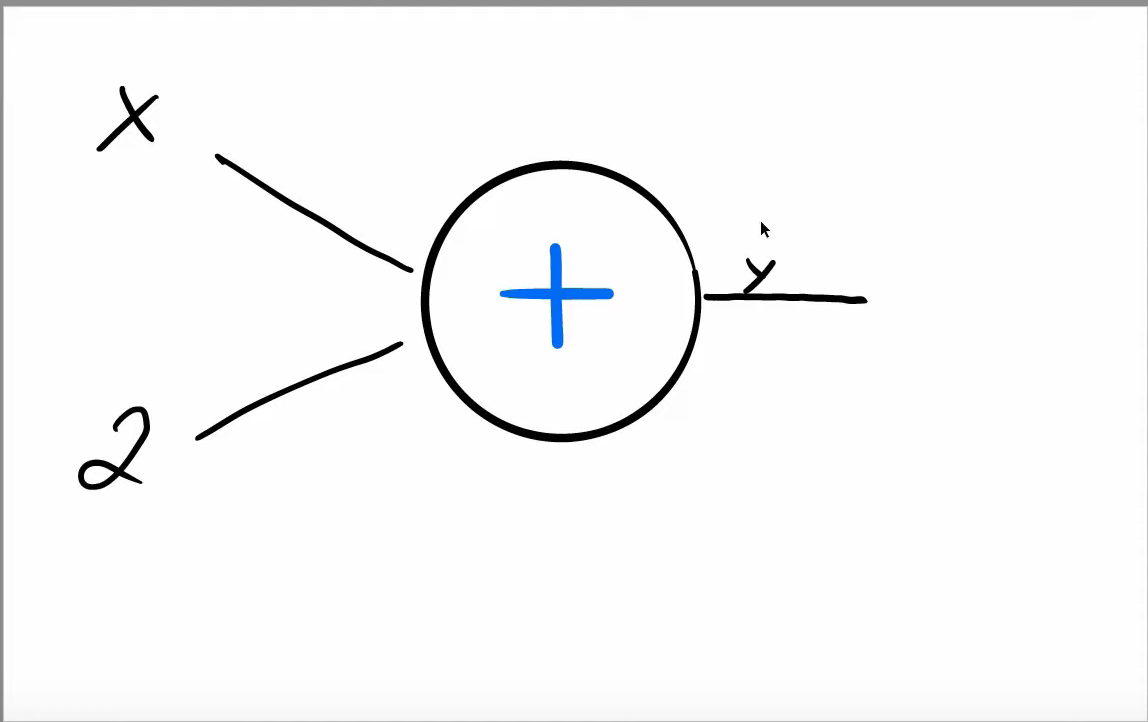

Back propagation: calculate gradients. For now, just focusing on how to use it. 

Forward pass: calculate output

Since requires_grad is true, pytorch will automatically create a function to do back propagation

y has an attribute grad_fn

In [9]:
y

tensor([2.3174, 0.8122, 0.1778], grad_fn=<AddBackward0>)

In [8]:
y.grad_fn

This AddBackward will apply backpropagation through this operation

In [10]:
z = y*y*2
z

tensor([10.7404,  1.3193,  0.0632], grad_fn=<MulBackward0>)

In [11]:
z = z.mean()
z

tensor(4.0410, grad_fn=<MeanBackward0>)

This will calculate the gradient of z with respect to x

In [12]:
z.backward() #

This stores the gradients to x.grad

In [14]:
print(x.grad)

tensor([3.0898, 1.0829, 0.2370])


What if we don't specify requires_grad = True? 

In [15]:
x = torch.randn(3)
y = x + 2
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Mathematically, this creates a vector jacobian matrix of a bunch of partial derivates -> chain rule on steroids

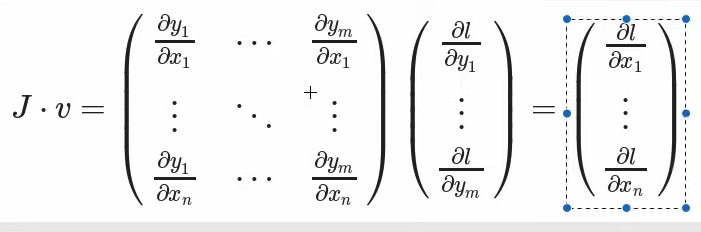

In [16]:
x = torch.randn(3, requires_grad=True)
y = x + 2
z = y*y*2
print(z)

tensor([ 0.1007,  0.1431, 11.8733], grad_fn=<MulBackward0>)


If z is not a scalar, we need an argument for backward()<br> 
Usually, we wind up creating a scalar value (this is probably the value of the error funciton)<br> 

In [18]:
# create a vector of the same size
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)

In [19]:
x.grad

tensor([0.0898, 1.0700, 0.0097])

Sometimes during training, weight updates should not be part of gradient operation. We need to prevent pytorch from tracking gradients. 

1) call x.requires_grad_(false)<br>
2) call x.detach -> creates new tensor<br>
3) wrap in: with torch.no_grad():<br>

trailing underscore = modifies variable in place

In [20]:
x.requires_grad_(False)
x

tensor([-1.7756, -1.7325,  0.4365])

In [22]:
x = torch.randn(3, requires_grad=True)
y = x.detach()
print(x)
y

tensor([-0.1922, -0.5988,  1.0309], requires_grad=True)


tensor([-0.1922, -0.5988,  1.0309])

In [23]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([1.8078, 1.4012, 3.0309])


We must be very careful since gradients can accumulate

Do some dummy training for illustration:

In [29]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(100):
    
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    if epoch % 10 == 0:
        print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([33., 33., 33., 33.])
tensor([63., 63., 63., 63.])
tensor([93., 93., 93., 93.])
tensor([123., 123., 123., 123.])
tensor([153., 153., 153., 153.])
tensor([183., 183., 183., 183.])
tensor([213., 213., 213., 213.])
tensor([243., 243., 243., 243.])
tensor([273., 273., 273., 273.])


Before we do the next step, we need to empty the gradients

In [31]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(100):
    
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    if epoch % 10 == 0:
        print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Now everything is correct!

Later: we will work with builtin optimizers. before the next step, we need to run zero_grad() on the optimizer. 